In [3]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
breach_df = pd.ExcelFile('breach_report.xls')

In [5]:
breach_df = breach_df.parse('Sheet0')


In [6]:
breach_df.head()


,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,Brooke Army Medical Center,TX,Healthcare Provider,1000.0,10/21/2009,Theft,Paper/Films,No,A binder containing the protected health infor...
1,"Mid America Kidney Stone Association, LLC",MO,Healthcare Provider,1000.0,10/28/2009,Theft,Network Server,No,Five desktop computers containing unencrypted ...
2,Alaska Department of Health and Social Services,AK,Healthcare Provider,501.0,10/30/2009,Theft,"Other, Other Portable Electronic Device",No,\N
3,Health Services for Children with Special Need...,DC,Health Plan,3800.0,11/17/2009,Loss,Laptop,No,A laptop was lost by an employee while in tran...
4,"Mark D. Lurie, MD",CA,Healthcare Provider,5166.0,11/20/2009,Theft,Desktop Computer,No,A shared Computer that was used for backup was...


In [7]:
# Q1. Which states are most affected by the medical breaches?
# We can infer from the data that the total number of occurances of a certain state under 
# the State column indicates the number of breaches that have occured in that particular
# state

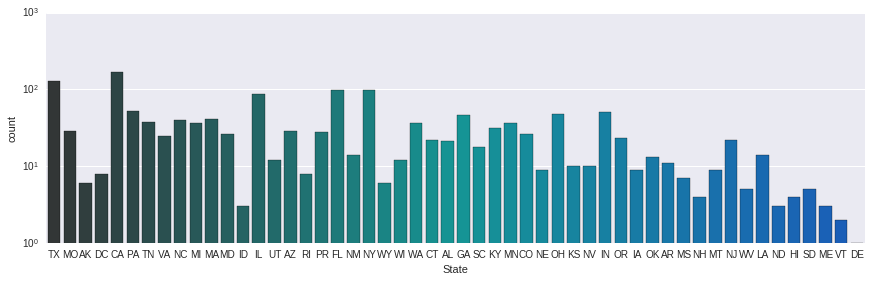

In [270]:
g = sns.factorplot('State', data = breach_df, kind = 'count', palette = 'winter_d', aspect = 3)
g.fig.get_axes()[0].set_yscale('log')

In [9]:
# As we can see, California, Texas, Illinois, Florida and New York
# take the top 5 positions for most occurances of medical breaches

In [10]:
# Q2. How many individuals (by state) were affected by these breaches ?

In [11]:
# Here we use the groupby function to group the dataframe in terms of state in order to get the 
# individuals affected for each state
affected = breach_df.groupby('State').sum()
affected

,Individuals Affected
State,
AK,9053.0
AL,1081032.0
AR,32503.0
AZ,215657.0
CA,7273864.0
CO,187865.0
CT,215408.0
DC,33350.0
DE,1883.0


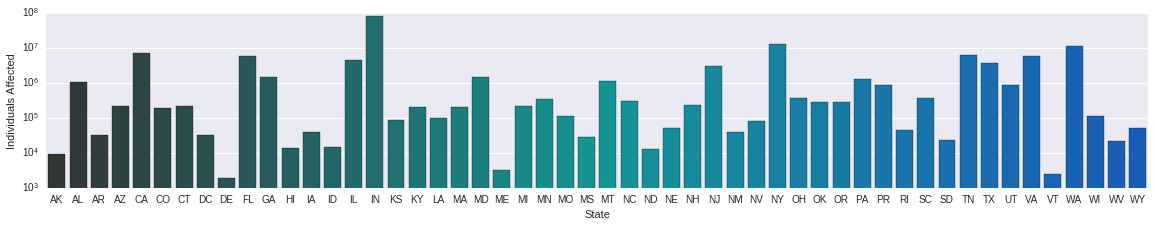

In [273]:
p = sns.factorplot(x = affected.index.values, y = 'Individuals Affected', kind = 'bar', palette = 'winter_d', data = affected,aspect = 4)
p.set(xlabel = 'State')
p.fig.get_axes()[0].set_yscale('log')

In [13]:
# As we can see, Indiana seems to have an unreasonably high number of individuals affected due to 
# medical breaches. How does this relate to the number of breaches that occur in the state? 

In [14]:
# Seemingly, although Indiana has the highest number of individuals affected, it ranks 7th in the 
# total number of breaches per state
breach_df['State'].value_counts().sort_values().tail(10)

MA     41
GA     47
OH     48
IN     51
PA     52
IL     86
FL     97
NY     99
TX    127
CA    170
Name: State, dtype: int64

In [15]:
# Let us try to find a correlation here between the number of breaches in each state and the 
# individuals affected. After the above analysis, my intuition tells me that there is not much
# correlation between the total number of breaches for each state and the number of individuals
# affected. Lets test that out.

In [16]:
#In order to do the above, we have to create a DataFrame that contains columns for the number of 
# individuals affected in each state and the number of breaches in each state.

In [17]:
# Getting the number of breaches per state 
BreachByState = breach_df['State'].value_counts()
BreachByState = BreachByState.rename('Breaches By State')

In [18]:
# Getting the individuals affected by each state
AffectedByState =  breach_df.groupby('State')['Individuals Affected'].sum()

In [19]:
#Making the two series into a dataframe
breach_df2 = pd.concat([BreachByState,AffectedByState], axis  = 1)

In [20]:
breach_df2

,Breaches By State,Individuals Affected
AK,6,9053.0
AL,21,1081032.0
AR,11,32503.0
AZ,29,215657.0
CA,170,7273864.0
CO,26,187865.0
CT,22,215408.0
DC,8,33350.0
DE,1,1883.0
FL,97,5741447.0


In [21]:
breach_df2.corr()

,Breaches By State,Individuals Affected
Breaches By State,1.000000,0.246021
Individuals Affected,0.246021,1.000000


In [22]:
# As we can see, the correlation between the two factors is 0.246021, since the
# value is close to 0, it indicates that the two factors are weakly correlated 
# (do not depend alot on each other). Hence our intuition is correct.  

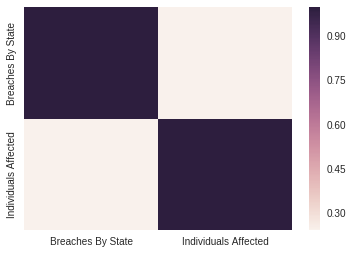

In [23]:
#We can map this correlation in a simple 2x2 matrix
sns.heatmap(breach_df2.corr())

In [24]:
# Q3. What is the most common type of breaches? 


In [25]:
#Lets get the values of every type of breach
BreachVals = DataFrame(breach_df['Type of Breach'].value_counts().rename('Breach Count'))


In [26]:
BreachVals

,Breach Count
Theft,684
Unauthorized Access/Disclosure,315
Hacking/IT Incident,150
Loss,114
Other,78
Improper Disposal,49
"Theft, Unauthorized Access/Disclosure",24
"Loss, Theft",14
"Hacking/IT Incident, Unauthorized Access/Disclosure",10
Unknown,10


In [32]:
#Lets set a name to the types of breaches mentioned in the dataframe
BreachVals.index.name = 'Breach Type'

In [33]:
BreachVals.index.name

'Breach Type'

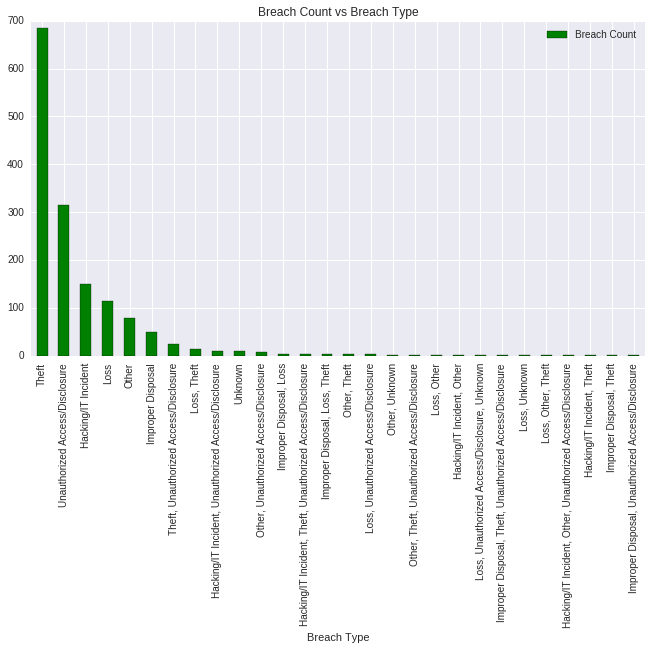

In [66]:
BreachVals.plot(kind = 'bar', title = 'Breach Count vs Breach Type', rot = 90, color = 'green'
               , figsize = (11,6),  y = 'Breach Count')


In [44]:
# As we can see, plain old theft seems to be the main cause of breaches of medical data

In [45]:
# Q.4 How does the number of affected people change across the time period described by the 
# dataset?


In [67]:
breach_df.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,Brooke Army Medical Center,TX,Healthcare Provider,1000.0,10/21/2009,Theft,Paper/Films,No,A binder containing the protected health infor...
1,"Mid America Kidney Stone Association, LLC",MO,Healthcare Provider,1000.0,10/28/2009,Theft,Network Server,No,Five desktop computers containing unencrypted ...
2,Alaska Department of Health and Social Services,AK,Healthcare Provider,501.0,10/30/2009,Theft,"Other, Other Portable Electronic Device",No,\N
3,Health Services for Children with Special Need...,DC,Health Plan,3800.0,11/17/2009,Loss,Laptop,No,A laptop was lost by an employee while in tran...
4,"Mark D. Lurie, MD",CA,Healthcare Provider,5166.0,11/20/2009,Theft,Desktop Computer,No,A shared Computer that was used for backup was...


In [71]:
# In essence, we would like a monthly timeline that displays the change in affected individuals
# across the range of years provided by the dataset. 

In [72]:
#Let us design a function such that we get the data we need. 

In [139]:
month = []
year = []
for date in breach_df['Breach Submission Date']:
    month.append(date[0:2])
    year.append(date[6:len(date)])

In [142]:
breach_df['Month'] = month
breach_df['Year'] = year
breach_df = breach_df.drop('Timeline Position', axis = 1)

In [143]:
breach_df.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description,Month,Year
0,Brooke Army Medical Center,TX,Healthcare Provider,1000.0,10/21/2009,Theft,Paper/Films,No,A binder containing the protected health infor...,10,2009
1,"Mid America Kidney Stone Association, LLC",MO,Healthcare Provider,1000.0,10/28/2009,Theft,Network Server,No,Five desktop computers containing unencrypted ...,10,2009
2,Alaska Department of Health and Social Services,AK,Healthcare Provider,501.0,10/30/2009,Theft,"Other, Other Portable Electronic Device",No,\N,10,2009
3,Health Services for Children with Special Need...,DC,Health Plan,3800.0,11/17/2009,Loss,Laptop,No,A laptop was lost by an employee while in tran...,11,2009
4,"Mark D. Lurie, MD",CA,Healthcare Provider,5166.0,11/20/2009,Theft,Desktop Computer,No,A shared Computer that was used for backup was...,11,2009


In [224]:
monthGroup = breach_df.groupby(['Year','Month'])

In [236]:
monthlyAffected = monthGroup.sum()

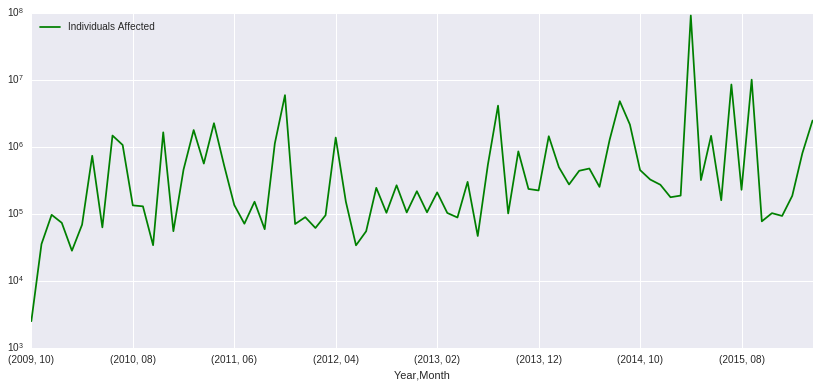

In [243]:
monthlyAffected.plot(kind = 'line', figsize = (14,6), logy = True,color = 'green')
#Add a trend line bruh wut u doin

In [244]:
# as we can see, there is a noticiable inconsistency in the number of individuals who are being affected by medical data 
# breaches. Although, we can certainlly notice an increasing trend indicicating greater security measures must be taken
# in order to protect data

In [245]:
# Q.5 Is there any correlation between the type of theft and number of people affected?


In [246]:
AffectedBreachTypes = breach_df.groupby('Type of Breach')

In [253]:
Total_Affected = AffectedBreachTypes.sum()

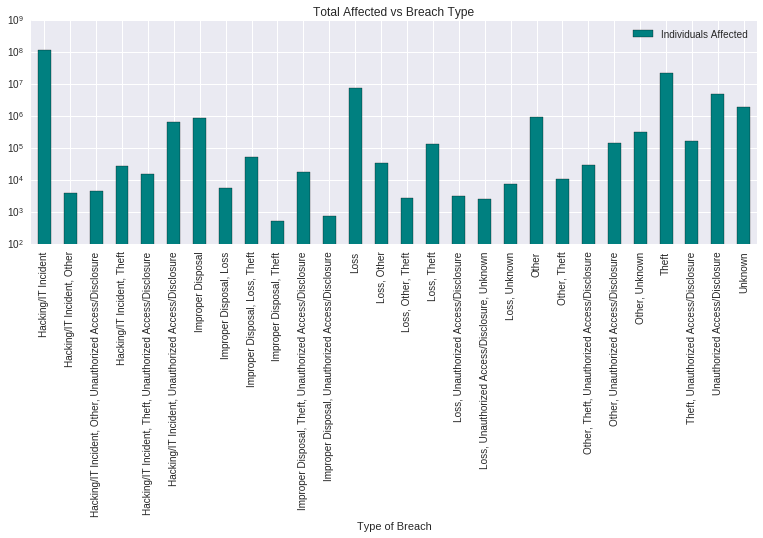

In [262]:
Total_Affected.plot(kind = 'bar', rot = 90, logy = True, title = 'Total Affected vs Breach Type', color = 'teal', figsize = (13,4))

In [263]:
# Another observation arises, we note from the above graph that most individuals are affected by Hacking/IT incidents, but 
# our earlier analysis showed that most of the data was lost (to a great degree) due to theft. This is not to say that 
# Theft plays a small role in affecting people. As we can see, Theft follows Hacking/IT as the second highest factor
# affecting people through breaches. 

In [264]:
# For our last exercise, lets look for any correlation between the type of breach and the number of people affected by 
# these breaches. 
breach_df3 = pd.concat([Total_Affected,BreachVals], axis = 1)

In [265]:
breach_df3.corr()

,Individuals Affected,Breach Count
Individuals Affected,1.000000,0.322839
Breach Count,0.322839,1.000000


In [266]:
# As we can see, there is only a very small correlation between the number of people affected and the type of breaches. 


In [ ]:
# End. 